# Pima Indians Diabetes Database

#### Predict the onset of diabetes based on diagnostic measures

In [1]:
# se importan librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score,recall_score,roc_curve,auc,classification_report,precision_recall_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# se cargan los datos
datos = pd.read_csv('diabetes.csv')

In [4]:
#Se observan los tipos de datos que tiene la base de datos
datos.info()
# No hay datos faltantes pero por si las moscas...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
datos.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

conclusiones:
- Todas las columnas son numéricas.
- No hay datos faltantes

In [6]:
#Hechamos un vistazo al DataFrame
datos.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


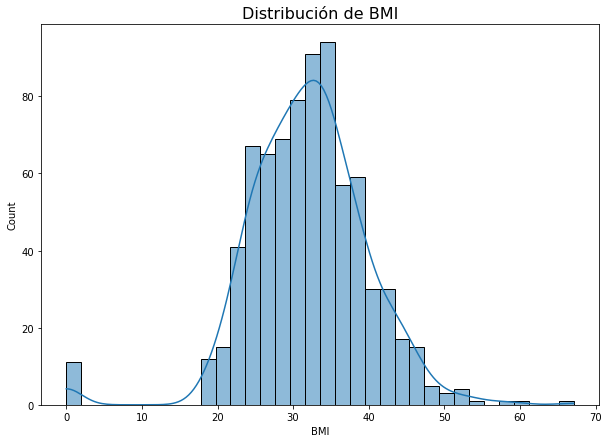

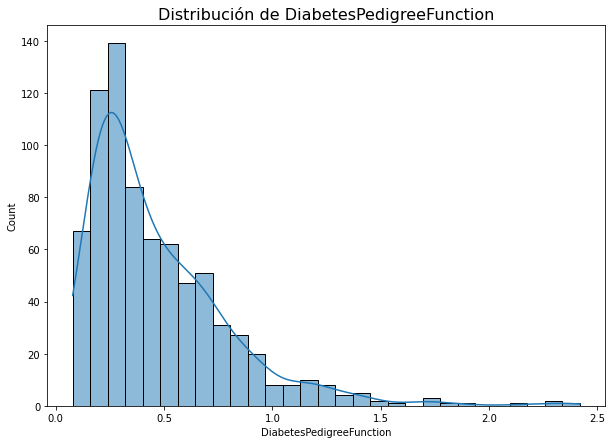

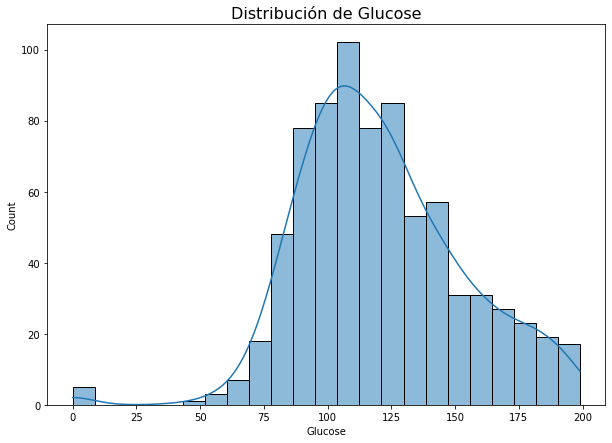

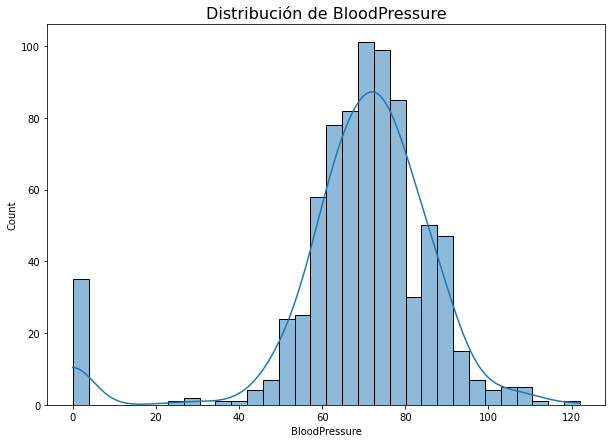

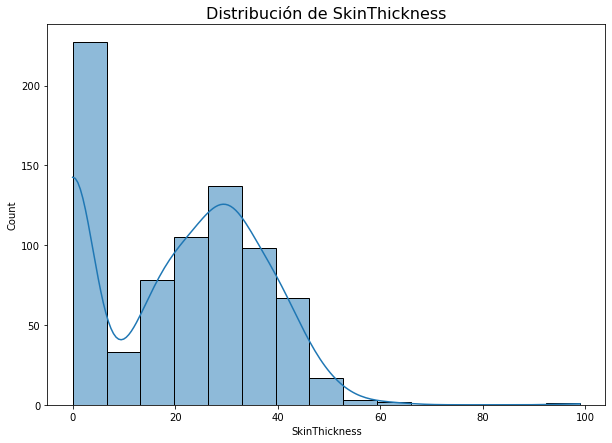

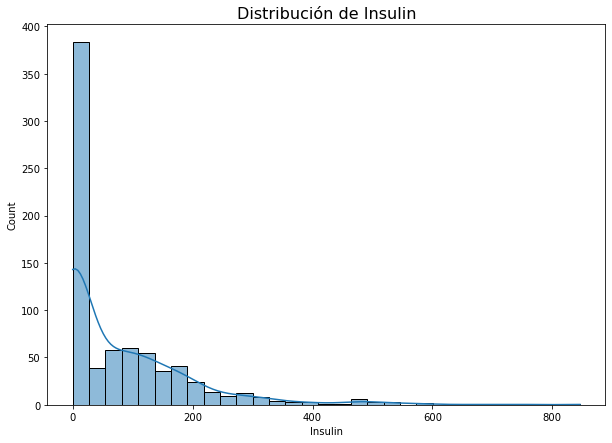

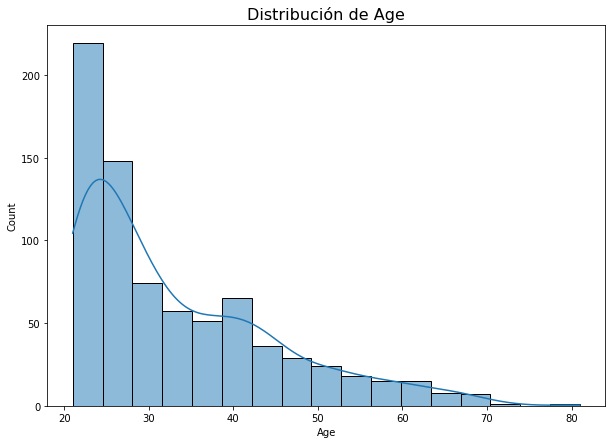

In [7]:
#comanezamos con el análisis univariable 
columns = ['BMI','DiabetesPedigreeFunction','Glucose','BloodPressure','SkinThickness','Insulin','Age']
for i in columns:
    plt.figure(figsize = (10,7))
    sns.histplot(data = datos, x = i, kde = True)
    plt.title('Distribución de ' + i, fontsize = 16)
    plt.show()

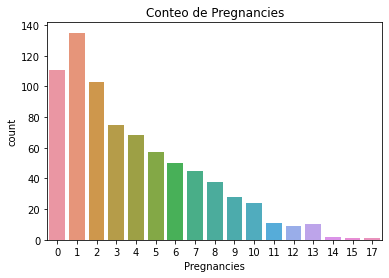

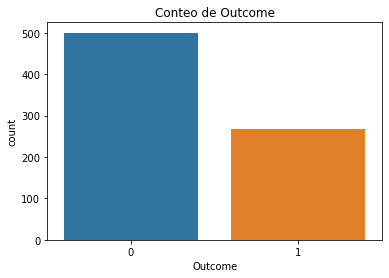

In [8]:
columns = ['Pregnancies','Outcome']
for i in columns:
    sns.countplot(data = datos, x = i)
    plt.title('Conteo de ' + i)
    plt.show()

Conclusiones:
- La distribución de BMI se ve normal, aunque se puede observar que el BMI se encuentra entre 28 y 35, lo cuál nos indica que en su mayoría son personas con obesidad. Se observa tambien outliers que seguramente son por errores de captura.
- Se observa que DiabetesPedigreeFunction esta inclinada hacia la izquierda con datos entre 1 y 3.1.
- Se observa que la distribución de Glucosa tiene una distribución normal.
- Es más frecuente tener un embarazo, mientras que sorprendentemente hay información con embarazos de hasta 17 veces.
- Hay un desequilibrio de clases en la clase positiva.

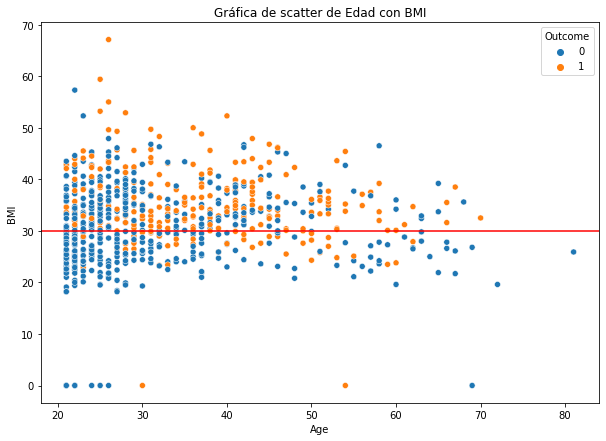

In [9]:
# análisis multivariable
plt.figure(figsize = (10,7))
sns.scatterplot(data = datos, x = 'Age', y = 'BMI', hue = 'Outcome')
plt.axhline(30, color = 'red')
plt.title('Gráfica de scatter de Edad con BMI')
plt.show()

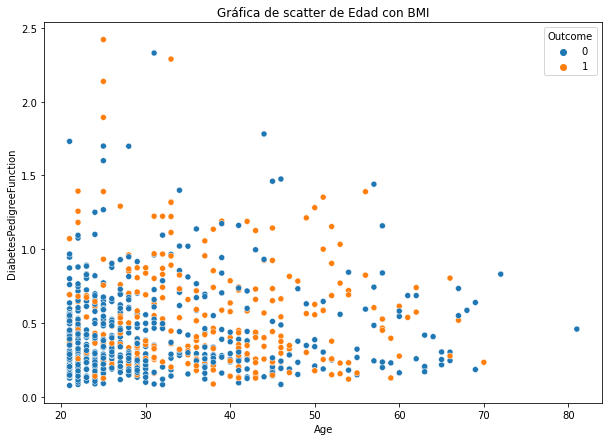

In [10]:
plt.figure(figsize = (10,7))
sns.scatterplot(data = datos, x = 'Age', y = 'DiabetesPedigreeFunction', hue = 'Outcome')
plt.title('Gráfica de scatter de Edad con BMI')
plt.show()

Se observa que aquí la edad es un factor un factor determinante en la diabetes, se ve una ligera disposición en las personas jóvenes que tienen DiabetesPedigree elevado a tener diabetes.

In [11]:
datos['Age_cat'] = pd.cut(datos['Age'],
                          bins = [0,25,40,60,np.inf],
                          labels = ['jóvenes','adultos','Mayores','3ra edad'])

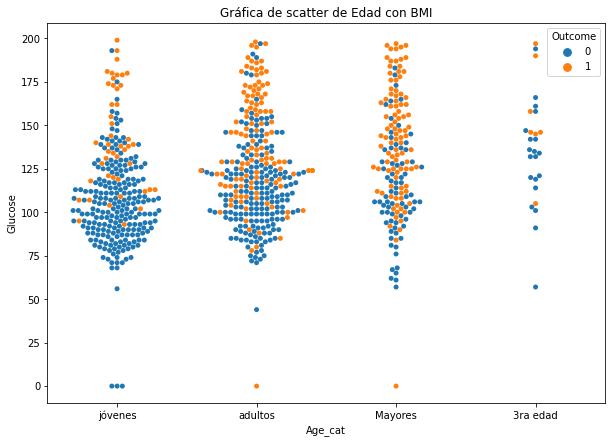

In [12]:
plt.figure(figsize = (10,7))
sns.swarmplot(data = datos, x = 'Age_cat', y = 'Glucose', hue = 'Outcome')
plt.title('Gráfica de scatter de Edad con BMI')
plt.show()

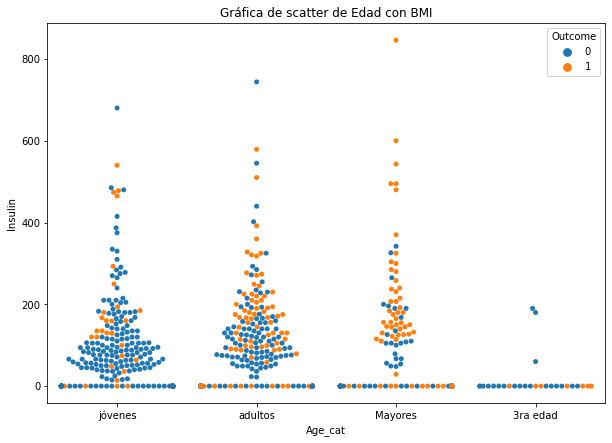

In [13]:
plt.figure(figsize = (10,7))
sns.swarmplot(data = datos, x = 'Age_cat', y = 'Insulin', hue = 'Outcome')
plt.title('Gráfica de scatter de Edad con BMI')
plt.show()

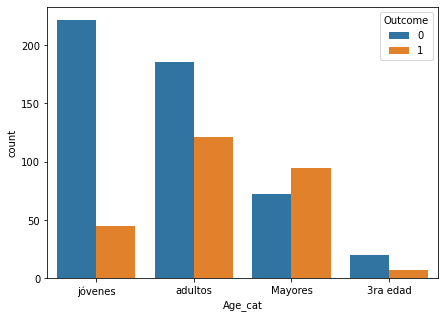

In [14]:
plt.figure(figsize = (7,5))
sns.countplot(data = datos, x = 'Age_cat', hue = 'Outcome')
plt.show()

conclusiones:
- Se puede observar que tener un índice de masa corporal elevado es un indicador de tener predisposición a ser diabético. (Nada nuevo).
- Se observa que tener una glucosa elevado es un factor de riesgo para tener diabates, siendo las personas mayores más susceptibles a tener glucosa elevada.

### Matriz de correlación

In [15]:
datos = pd.read_csv('diabetes.csv')

In [16]:
corr = datos.corr()

In [17]:
mask = np.triu(np.ones_like(corr,dtype= bool))

In [18]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

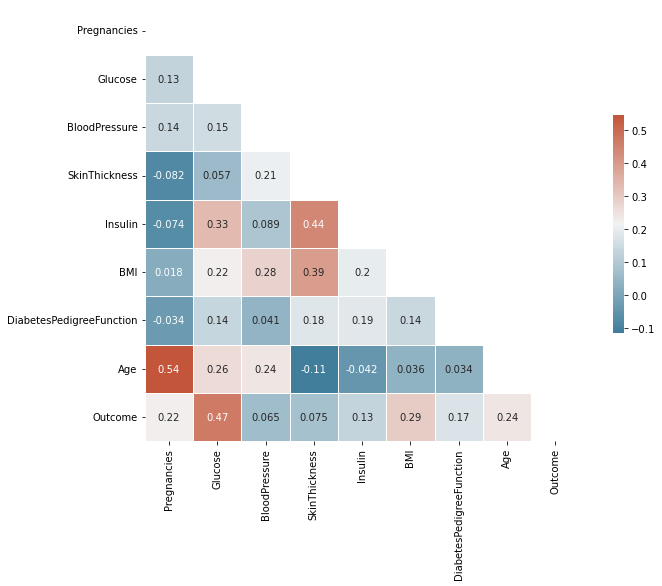

In [19]:
plt.figure(figsize = (12,8))
sns.heatmap(corr, mask=mask, cmap = cmap, annot = True, square = True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [20]:
lista = list(datos.columns)

In [21]:
lista

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [22]:
len(lista)

9

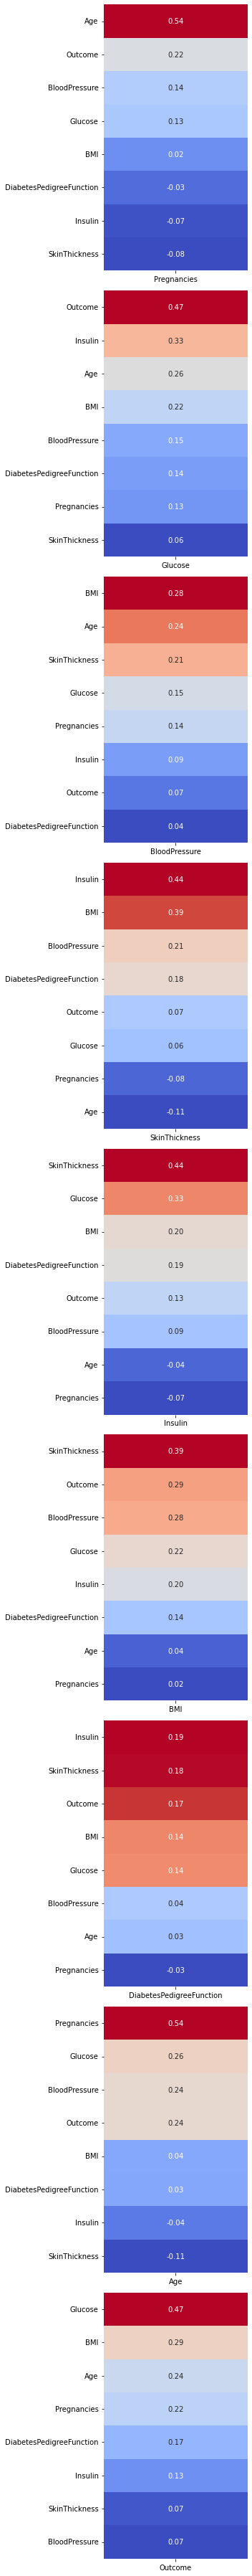

In [23]:
fig,axs = plt.subplots(len(lista),1,figsize = (5,50))
plt.subplots_adjust(hspace=.5)
corr = datos.corr()
for ax,disease in zip (axs,lista):
    target_corr = corr[disease].drop(disease)
    target_corr_sorted = target_corr.sort_values(ascending = False)
    sns.heatmap(target_corr_sorted.to_frame(), ax = ax, cmap = 'coolwarm',annot = True, fmt = '.2f', cbar = False)
    plt.tight_layout()
    


## Preparando la base de datos para el modelo

In [24]:
#cargamos de nuevo el dataset
datos = pd.read_csv('diabetes.csv')

In [25]:
#separamos los datos de variable independiente(x) y variable dependiente(y)
X = datos.drop('Outcome',axis = 1)
y = datos['Outcome']

In [26]:
# Ahora realizamos el barajeo del dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, shuffle = True)

In [27]:
# importamos SMOTE para balancear la clase minoritaria
from imblearn.over_sampling import SMOTE
resampling = SMOTE(sampling_strategy = 'minority')
X_resample,y_resample = resampling.fit_resample(X_train,y_train)

In [28]:
len(y_resample)

816

In [29]:
#armamos un pipeline
pipeline = Pipeline([
    ('escalar',StandardScaler()),
])

In [30]:
X_tr = pd.DataFrame(pipeline.fit_transform(X_resample),columns = X_resample.columns)

In [31]:
#importamos el modelo a usar en este caso LogistcRegression
from sklearn.linear_model import LogisticRegression

In [32]:
#creamos el objeto y luego ajustamos el modelo
log_reg = LogisticRegression(multi_class = 'multinomial')
log_reg.fit(X_tr,y_resample)

LogisticRegression(multi_class='multinomial')

In [33]:
y_pred = log_reg.predict(X_tr)

In [34]:
# vemos de manera general como nos fue con el modelo clasificando
print(classification_report(y_resample,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       408
           1       0.74      0.72      0.73       408

    accuracy                           0.74       816
   macro avg       0.74      0.74      0.74       816
weighted avg       0.74      0.74      0.74       816



In [35]:
#cuál fuera el resultado sin usar el remuestreo ?
x_normal_tr = pd.DataFrame(pipeline.fit_transform(X_train),columns = X_train.columns)

In [36]:
log_reg_normal = LogisticRegression(multi_class = 'multinomial')
log_reg_normal.fit(x_normal_tr,y_train)
y_pred = log_reg_normal.predict(x_normal_tr)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       408
           1       0.74      0.57      0.64       206

    accuracy                           0.79       614
   macro avg       0.77      0.73      0.74       614
weighted avg       0.78      0.79      0.78       614



In [37]:
cm = confusion_matrix(y_train,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = log_reg_normal.classes_)

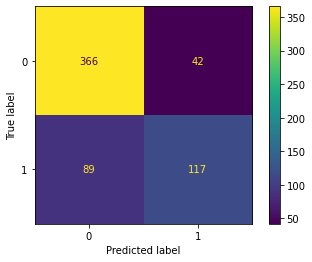

In [38]:
disp.plot()
plt.show()

In [39]:
#ahora probaremos con otro modelo
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth = 7,n_estimators = 100)
forest.fit(x_normal_tr,y_train)
y_pred = forest.predict(x_normal_tr)

In [40]:
# claramente se observa un sobre ajuste
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       408
           1       0.98      0.77      0.86       206

    accuracy                           0.92       614
   macro avg       0.93      0.88      0.90       614
weighted avg       0.92      0.92      0.91       614



In [41]:
#ahora probaremos con un cross validation
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(forest,x_normal_tr,y_train, scoring = 'accuracy', cv = 10)

In [42]:
# al realizar un K-fold, los resultados se ajustan a la realidad en donde obtenemos un resultado muy similar al primer modelo en cuanto al accuracy
resultados.mean()

0.7654944473823374

In [44]:
#ahora aplicaremos un GridSearchCV para encontrar los mejores valores para los parámetros que nos lleguen a dar los mejores resultados
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'max_depth':[3,6,9,12],
    'n_estimators':[100,500,1000],
}]

grid_search = GridSearchCV(forest,param_grid,cv = 10,scoring = 'accuracy')
grid_search.fit(x_normal_tr,y_train)
grid_search.best_params_

{'max_depth': 6, 'n_estimators': 500}

In [45]:
# se puede observar una mejora pero es ínfima. Asi que el plan c, será utilizar XGBOOST
grid_search.best_score_

0.7752247488101534

In [46]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_normal_tr,y_train)
y_pred = xgb.predict(x_normal_tr)

In [47]:
#se ve un modelo perfecto...por lo tanto la primera conclusión es que está realizando un Sobreajuste
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       1.00      1.00      1.00       206

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [48]:
#Procedemos a realizar un k-fold
resultados = cross_val_score(xgb,x_normal_tr,y_train,cv = 10, scoring = 'accuracy')
#como resultados vemos un decremento en accuracy de 3 puntos.
resultados.mean()

0.739264939185616

In [50]:
grid_params = [{
    'n_estimators':[100,500,1000],
    'learning_rate':[0.1,0.01],
    'max_depth':[3,4,5,10],
    'scale_pos_weight':[sum(y_train==0)/sum(y_train==1)]
}]

In [51]:
grid = GridSearchCV(xgb,grid_params,cv = 10,scoring = 'accuracy')

In [52]:
grid.fit(x_normal_tr,y_train)
y_pred = grid.predict(x_normal_tr)

In [53]:
grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 1000,
 'scale_pos_weight': 1.9805825242718447}

In [54]:
print(confusion_matrix(y_train,y_pred))

[[361  47]
 [ 15 191]]


In [55]:
grid.best_score_

0.750713907985193

In [56]:
#ahora hacemos la prueba utilizando la técnica de SMOTE 
grid_resam = [{
    'n_estimators':[100,500,1000],
    'learning_rate':[0.1,0.01],
    'max_depth':[5,10,20],
}]
xgb.fit(X_tr,y_resample)
grid = GridSearchCV(xgb,grid_resam,cv = 10, scoring = 'accuracy')
grid.fit(X_tr,y_resample)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid=[{'learning_rate': [0.1, 0.01],
                          'max_depth': [5, 10, 20],
                          'n_estimators': [100, 500, 1000]}],
             scoring='accuracy')

In [57]:
y_pred = grid.predict(X_tr)

In [58]:
#utilizando la técnica con SMOTE obtenemos un mejor resultado con 5 puntos más
grid.best_score_

0.8102830472749172

In [59]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100}

In [60]:
print(classification_report(y_resample,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       1.00      1.00      1.00       408

    accuracy                           1.00       816
   macro avg       1.00      1.00      1.00       816
weighted avg       1.00      1.00      1.00       816



In [61]:
resultados = cross_val_score(grid,X_tr,y_resample, cv = 10, scoring = 'accuracy')

In [62]:
#si bien se observa una clasificación perfecta en el reporte de clasificación, al utilizar k-fold, los resultados obtenidos se vuelven más realistas
resultados.mean()

0.8005118940078291

In [63]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(grid,X_tr,y_resample,cv = 3)

In [64]:
y_true = np.array(list(y_resample) * 10)

In [65]:
print(len(y_true))
print(len(y_pred))

8160
816


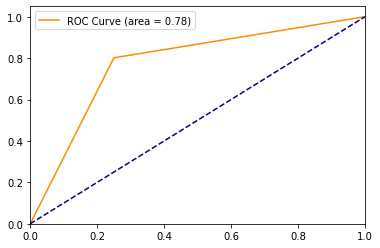

In [87]:
fpr,tpr,_ = roc_curve(y_resample,y_pred)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr, color = 'darkorange', label = 'ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1], ls = '--', color = 'navy')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.legend()
plt.show()

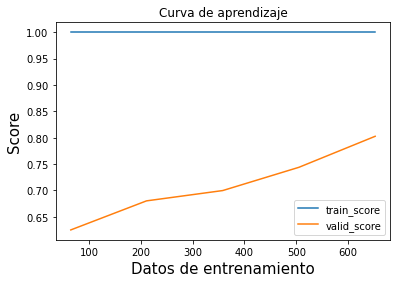

In [91]:
train_sizes, train_score, valid_score = learning_curve(xgb,X_tr,y_resample,train_sizes = np.linspace(0.1,1,5) ,cv = 5)
plt.plot(train_sizes,train_score.mean(axis=1), label = 'train_score')
plt.plot(train_sizes,valid_score.mean(axis=1), label = 'valid_score')
plt.xlabel('Datos de entrenamiento',fontsize = 15)
plt.ylabel('Score',fontsize = 15)
plt.title('Curva de aprendizaje')
plt.legend()
plt.show()

In [68]:
x_tr_test = pipeline.transform(X_test)

In [69]:
y_final = xgb.predict(x_tr_test)

In [70]:
print(classification_report(y_test,y_final))

              precision    recall  f1-score   support

           0       0.83      0.73      0.77        92
           1       0.66      0.77      0.71        62

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.76      0.75      0.75       154



conclusiones:
- El modelo tiende a predecir mejor la clase negativa(0) con un 83% de precision, mientras que con la clase positiva (1) no es tan precisa 66%.
- En la curva de aprendizaje se puede ver que a mayores datos mejor resultado.